In [1]:
!pip install --upgrade quantecon interpolation

  Obtaining dependency information for quantecon from https://files.pythonhosted.org/packages/33/ea/e64e1be90daf370f5b190ceb298b9ac92105b3672775dce77acde8ccf603/quantecon-0.7.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/56.6 kB ? eta -:--:--
     ------------------------------------ --- 51.2/56.6 kB ? eta -:--:--
     ------------------------------------ --- 51.2/56.6 kB ? eta -:--:--
     ------------------------------------ --- 51.2/56.6 kB ? eta -:--:--
     ------------------------------------ --- 51.2/56.6 kB ? eta -:--:--
     ------------------------------------ --- 51.2/56.6 kB ? eta -:--:--
     ------------------------------------ --- 51.2/56.6 kB ? eta -:--:--
     ------------------------------------ --- 51.2/56.6 kB ? eta -:--:--
     ------------------------------------ --- 51.2/56.6 kB ? eta -:--:--
     ------------------------------------ --- 51.2/56.6 kB ? eta -:--:--
     ------------------------------------ --- 51.2/56.6 kB ? eta -:-

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe
import random as rd
from interpolation import interp

C:\Users\user\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


# Lorenz curve

In economics, the Lorenz curve is a graphical representation of the distribution of income or of wealth. It was developed by Max O. Lorenz in 1905 for representing inequality of the wealth distribution.

The curve is a graph showing the proportion of overall income or wealth assumed by the bottom x% of the people, although this is not rigorously true for a finite population (see below). It is often used to represent income distribution, where it shows for the bottom x% of households, what percentage (y%) of the total income they have. The percentage of households is plotted on the x-axis, the percentage of income on the y-axis. It can also be used to show distribution of assets. In such use, many economists consider it to be a measure of social inequality.

The concept is useful in describing inequality among the size of individuals in ecology[1] and in studies of biodiversity, where the cumulative proportion of species is plotted against the cumulative proportion of individuals.[2] It is also useful in business modeling: e.g., in consumer finance, to measure the actual percentage y% of delinquencies attributable to the x% of people with worst risk scores.

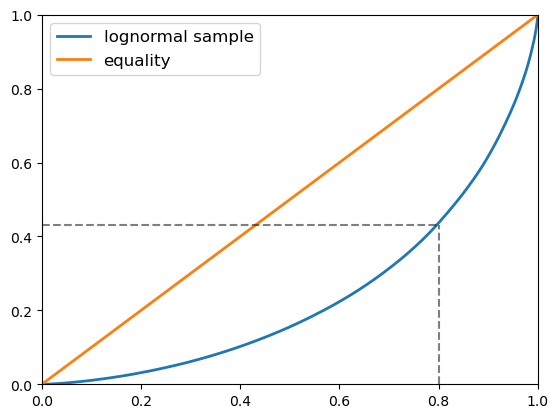

In [3]:
n = 2000
sample = np.exp(np.random.randn(n))

fig, ax = plt.subplots()

f_vals, l_vals = qe.lorenz_curve(sample)
ax.plot(f_vals, l_vals, label=f'lognormal sample', lw=2)
ax.plot(f_vals, f_vals, label='equality', lw=2)

ax.legend(fontsize=12)

ax.vlines([0.8], [0.0], [0.43], alpha=0.5, colors='k', ls='--')
ax.hlines([0.43], [0], [0.8], alpha=0.5, colors='k', ls='--')

ax.set_ylim((0, 1))
ax.set_xlim((0, 1))

plt.show()

In [4]:
url = 'https://media.githubusercontent.com/media/QuantEcon/high_dim_data/main/SCF_plus/SCF_plus_mini.csv'
df = pd.read_csv(url)
df = df.dropna()
df_income_wealth = df

In [5]:
df_income_wealth.head()

,year,n_wealth,t_income,l_income,weights,nw_groups,ti_groups
0,1950,266933.75,55483.027,0.0,0.998732,50-90%,50-90%
1,1950,87434.46,55483.027,0.0,0.998732,50-90%,50-90%
2,1950,795034.94,55483.027,0.0,0.998732,Top 10%,50-90%
3,1950,94531.78,55483.027,0.0,0.998732,50-90%,50-90%
4,1950,166081.03,55483.027,0.0,0.998732,50-90%,50-90%


In [6]:
df = df_income_wealth 

varlist = ['n_wealth',    # net wealth 
           't_income',    # total income
           'l_income']    # labor income

years = df.year.unique()

# Create lists to store Lorenz data

F_vals, L_vals = [], []

for var in varlist:
    # create lists to store Lorenz curve data
    f_vals = []
    l_vals = []
    for year in years:

        # Repeat the observations according to their weights
        counts = list(round(df[df['year'] == year]['weights'] )) 
        y = df[df['year'] == year][var].repeat(counts)
        y = np.asarray(y)
        
        # Shuffle the sequence to improve the plot
        rd.shuffle(y)    
               
        # calculate and store Lorenz curve data
        f_val, l_val = qe.lorenz_curve(y)
        f_vals.append(f_val)
        l_vals.append(l_val)
        
    F_vals.append(f_vals)
    L_vals.append(l_vals)

f_vals_nw, f_vals_ti, f_vals_li = F_vals
l_vals_nw, l_vals_ti, l_vals_li = L_vals

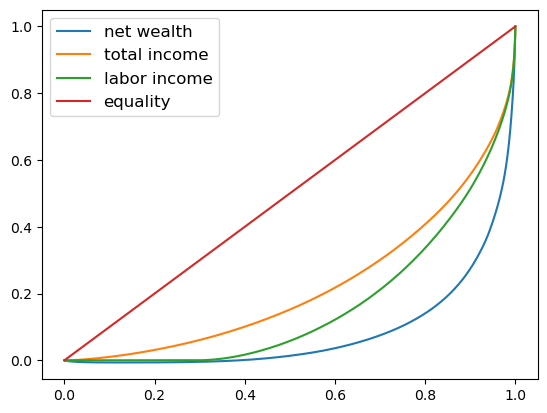

In [7]:
fig, ax = plt.subplots()

ax.plot(f_vals_nw[-1], l_vals_nw[-1], label=f'net wealth')
ax.plot(f_vals_ti[-1], l_vals_ti[-1], label=f'total income')
ax.plot(f_vals_li[-1], l_vals_li[-1], label=f'labor income')
ax.plot(f_vals_nw[-1], f_vals_nw[-1], label=f'equality')

ax.legend(fontsize=12)   
plt.show()

# Gini coefficient

The Lorenz curve is a useful visual representation of inequality in a distribution.

Another popular measure of income and wealth inequality is the Gini coefficient.

The Gini coefficient is just a number, rather than a curve.

In this section we discuss the Gini coefficient and its relationship to the Lorenz curve.

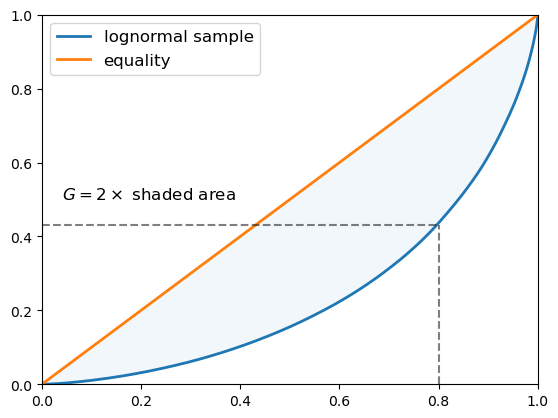

In [8]:
fig, ax = plt.subplots()

f_vals, l_vals = qe.lorenz_curve(sample)
ax.plot(f_vals, l_vals, label=f'lognormal sample', lw=2)
ax.plot(f_vals, f_vals, label='equality', lw=2)

ax.legend(fontsize=12)

ax.vlines([0.8], [0.0], [0.43], alpha=0.5, colors='k', ls='--')
ax.hlines([0.43], [0], [0.8], alpha=0.5, colors='k', ls='--')

ax.fill_between(f_vals, l_vals, f_vals, alpha=0.06)

ax.set_ylim((0, 1))
ax.set_xlim((0, 1))

ax.text(0.04, 0.5, r'$G = 2 \times$ shaded area', fontsize=12)
  
plt.show()

# simulated data

In [9]:
k = 5
σ_vals = np.linspace(0.2, 4, k)
n = 2_000

ginis = []

for σ in σ_vals:
    μ = -σ**2 / 2
    y = np.exp(μ + σ * np.random.randn(n))
    ginis.append(qe.gini_coefficient(y))

In [10]:
def plot_inequality_measures(x, y, legend, xlabel, ylabel):
    
    fig, ax = plt.subplots()
    ax.plot(x, y, marker='o', label=legend)

    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    ax.legend(fontsize=12)
    plt.show()

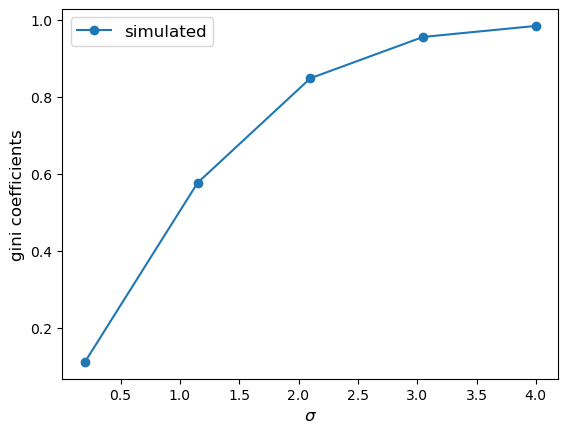

In [11]:
plot_inequality_measures(σ_vals, 
                         ginis, 
                         'simulated', 
                         '$\sigma$', 
                         'gini coefficients')

In [12]:
varlist = ['n_wealth',   # net wealth 
           't_income',   # total income
           'l_income']   # labor income

df = df_income_wealth

# create lists to store Gini for each inequality measure

Ginis = []

for var in varlist:
    # create lists to store Gini
    ginis = []
    
    for year in years:
        # repeat the observations according to their weights
        counts = list(round(df[df['year'] == year]['weights'] ))
        y = df[df['year'] == year][var].repeat(counts)
        y = np.asarray(y)
        
        rd.shuffle(y)    # shuffle the sequence
        
        # calculate and store Gini
        gini = qe.gini_coefficient(y)
        ginis.append(gini)
        
    Ginis.append(ginis)

In [13]:
ginis_nw, ginis_ti, ginis_li = Ginis

In [14]:
# use an average to replace an outlier in labor income gini
ginis_li_new = ginis_li
ginis_li_new[5] = (ginis_li[4] + ginis_li[6]) / 2

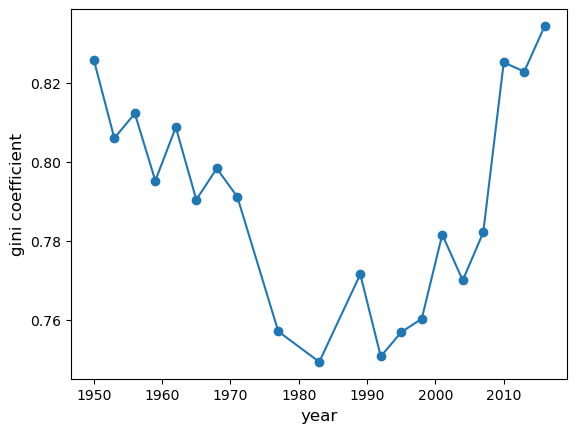

In [15]:
xlabel = "year"
ylabel = "gini coefficient"

fig, ax = plt.subplots()

ax.plot(years, ginis_nw, marker='o')

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)
    
plt.show()

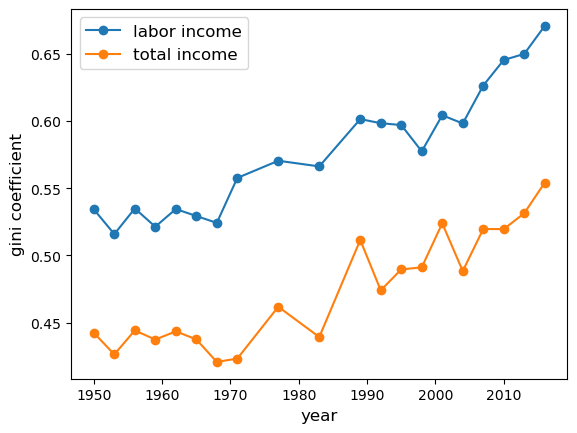

In [16]:
xlabel = "year"
ylabel = "gini coefficient"

fig, ax = plt.subplots()

ax.plot(years, ginis_li_new, marker='o', label="labor income")
ax.plot(years, ginis_ti, marker='o', label="total income")

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)

ax.legend(fontsize=12)
plt.show()

<p style="text-align:center">
    <a href="https://github.com/NeoMmusi?tab=repositories" target="_blank">
    <img src=" https://th.bing.com/th/id/R.c6a4e155b35d81c6049eb715bb2259d6?rik=3Nct05E1ppyarA&pid=ImgRaw&r=0" width="200" alt="Skills Network Logo"  />
    </a>
</p>

## Completed by : Neo Mmusi